In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel("./xlsx/시차상관분석6Data.xlsx",index_col=0)
df = df.set_index("DateTime")

# 대비 계산
df['대비_swapbasis_1Y'] = df['1Y_베이시스']-df['1Y_베이시스'].shift(1)
df['대비_swapbasis_2Y'] = df['2Y_베이시스']-df['2Y_베이시스'].shift(1)
df['대비_swapbasis_3Y'] = df['3Y_베이시스']-df['3Y_베이시스'].shift(1)
df['대비_swapbasis_5Y'] = df['5Y_베이시스']-df['5Y_베이시스'].shift(1)
df['대비_swapbasis_10Y'] = df['10Y_베이시스']-df['10Y_베이시스'].shift(1)

df['대비_국고_1Y'] = df['국고1년']-df['국고1년'].shift(1)
df['대비_국고_3Y'] = df['국고3년']-df['국고3년'].shift(1)
df['대비_국고_5Y'] = df['국고5년']-df['국고5년'].shift(1)
df['대비_국고_10Y'] = df['국고10년']-df['국고10년'].shift(1)

df['대비_통안_1Y'] = df['통안364일']-df['통안364일'].shift(1)
df['대비_통안_2Y'] = df['통안2년']-df['통안2년'].shift(1)

df['스왑포인트_1M'] = df['M1_스왑포인트']/100 
df['전일종가_ex'] = df['종가_ex'].shift(1)
df['종가_NDF_차이'] = df['전일종가_ex'] - df['Mid_ndf']

In [2]:
df.rename({ '1Y_전일비_irs' : '대비_irs_1Y', '2Y_전일비_irs' :'대비_irs_2Y','3Y_전일비_irs':'대비_irs_3Y', '5Y_전일비_irs' : '대비_irs_5Y', '10Y_전일비_irs' : '대비_irs_10Y',
           '1Y_전일비_crs' :'대비_crs_1Y', '2Y_전일비_crs' :'대비_crs_2Y','3Y_전일비_crs' : '대비_crs_3Y', '5Y_전일비_crs' :'대비_crs_5Y', '10Y_전일비_crs' : '대비_crs_10Y','전일비_ndf' :'대비_ndf'}, axis=1, inplace=True)


# 필요한 칼럼만 추출
df_1 = df[['대비_irs_1Y','대비_irs_2Y', '대비_irs_3Y', '대비_irs_5Y', '대비_irs_10Y',
           '대비_crs_1Y', '대비_crs_2Y', '대비_crs_3Y', '대비_crs_5Y', '대비_crs_10Y', 
           '대비_국고_1Y', '대비_국고_3Y', '대비_국고_5Y', '대비_국고_10Y', 
           '대비_통안_1Y', '대비_통안_2Y', '대비_ndf', '스왑포인트_1M', '전일종가_ex', 
           '종가_ex' ]]  

# 결측치 제거
df_1 = df_1.dropna()     

In [3]:
df_1.isna().sum()

대비_irs_1Y     0
대비_irs_2Y     0
대비_irs_3Y     0
대비_irs_5Y     0
대비_irs_10Y    0
대비_crs_1Y     0
대비_crs_2Y     0
대비_crs_3Y     0
대비_crs_5Y     0
대비_crs_10Y    0
대비_국고_1Y      0
대비_국고_3Y      0
대비_국고_5Y      0
대비_국고_10Y     0
대비_통안_1Y      0
대비_통안_2Y      0
대비_ndf        0
스왑포인트_1M      0
전일종가_ex       0
종가_ex         0
dtype: int64

In [5]:
x = df_1[['대비_irs_1Y', '대비_irs_2Y', '대비_irs_3Y', '대비_irs_5Y', '대비_irs_10Y',
       '대비_crs_1Y', '대비_crs_2Y', '대비_crs_3Y', '대비_crs_5Y', '대비_crs_10Y',
       '대비_국고_1Y', '대비_국고_3Y', '대비_국고_5Y', '대비_국고_10Y', '대비_통안_1Y', '대비_통안_2Y', '대비_ndf', '스왑포인트_1M',
       '전일종가_ex']]
y = df_1[['종가_ex']]

x.feature = x.columns 

from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(x)
data_scaled = scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled = pd.DataFrame(data = data_scaled, columns=x.feature)

x_scaled.index = y.index # 인덱스가 달라서 똑같이 설정

x_scaled

C:\Users\hyeok\AppData\Local\Temp\ipykernel_20652\4135598070.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  x.feature = x.columns


,대비_irs_1Y,대비_irs_2Y,대비_irs_3Y,대비_irs_5Y,대비_irs_10Y,대비_crs_1Y,대비_crs_2Y,대비_crs_3Y,대비_crs_5Y,대비_crs_10Y,대비_국고_1Y,대비_국고_3Y,대비_국고_5Y,대비_국고_10Y,대비_통안_1Y,대비_통안_2Y,대비_ndf,스왑포인트_1M,전일종가_ex
DateTime,,,,,,,,,,,,,,,,,,,
2012-08-03,-0.848159,-0.731938,-0.562641,-0.628439,-0.403644,-0.205379,-0.364044,-0.462614,-1.872301,-3.114970,-1.133777,-0.324094,-1.890723,-1.798842,-0.217667,-0.125961,0.686282,1.820638,-0.056282
2012-08-06,0.559997,0.481950,0.370979,0.415773,0.202253,-0.003127,-0.602217,-0.690720,-0.939235,-0.832887,0.563092,0.159979,0.000440,-0.000209,0.107313,0.123726,-1.668663,1.820638,-0.000487
2012-08-07,0.278366,-0.003605,-0.002469,0.206931,0.404219,0.401378,0.350478,-0.006403,-1.639035,-1.662735,-0.568154,-0.001379,0.000440,-0.000209,-0.109340,-0.125961,0.075741,1.911215,-0.104877
2012-08-08,0.278366,0.481950,0.370979,0.415773,0.606184,0.199126,-0.006783,-0.006403,-0.472702,-0.832887,-0.568154,-0.324094,-0.539892,-0.514104,-0.109340,-0.125961,0.206571,1.820638,-0.108476
2012-08-09,1.404890,1.453061,1.117875,1.042301,0.808150,1.817145,0.945913,0.906019,0.926898,0.826810,2.825583,0.966767,1.351270,1.284529,0.432293,0.747946,0.381012,1.775350,-0.117475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,-1.129790,-1.945827,-1.309537,-1.881494,-2.221333,-1.621146,-2.150347,-1.603142,-2.572101,-2.285122,-1.133777,-0.969524,-1.890723,-2.312737,-0.109340,-0.625337,0.572896,-0.896666,3.206786
2022-07-26,-0.284897,-0.489161,-0.562641,-0.628439,-0.605609,0.199126,-0.721304,-0.690720,-0.472702,-0.417963,0.563092,-0.485451,-0.539892,-0.771052,0.107313,-0.001117,0.189127,-0.987243,3.219385
2022-07-27,-0.284897,-1.217494,-1.122813,-1.254966,-1.211506,0.199126,-0.244957,-0.234509,-0.239435,-0.210501,-0.002531,-0.485451,-1.350390,-1.541894,0.215640,-0.125961,-0.098699,-0.851378,3.109596


c:\Users\hyeok\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


[Text(0, 0.5, '대비_irs_1Y'),
 Text(0, 1.5, '대비_irs_2Y'),
 Text(0, 2.5, '대비_irs_3Y'),
 Text(0, 3.5, '대비_irs_5Y'),
 Text(0, 4.5, '대비_irs_10Y'),
 Text(0, 5.5, '대비_crs_1Y'),
 Text(0, 6.5, '대비_crs_2Y'),
 Text(0, 7.5, '대비_crs_3Y'),
 Text(0, 8.5, '대비_crs_5Y'),
 Text(0, 9.5, '대비_crs_10Y'),
 Text(0, 10.5, '대비_국고_1Y'),
 Text(0, 11.5, '대비_국고_3Y'),
 Text(0, 12.5, '대비_국고_5Y'),
 Text(0, 13.5, '대비_국고_10Y'),
 Text(0, 14.5, '대비_통안_1Y'),
 Text(0, 15.5, '대비_통안_2Y'),
 Text(0, 16.5, '대비_ndf'),
 Text(0, 17.5, '스왑포인트_1M'),
 Text(0, 18.5, '전일종가_ex')]

c:\Users\hyeok\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Users\hyeok\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


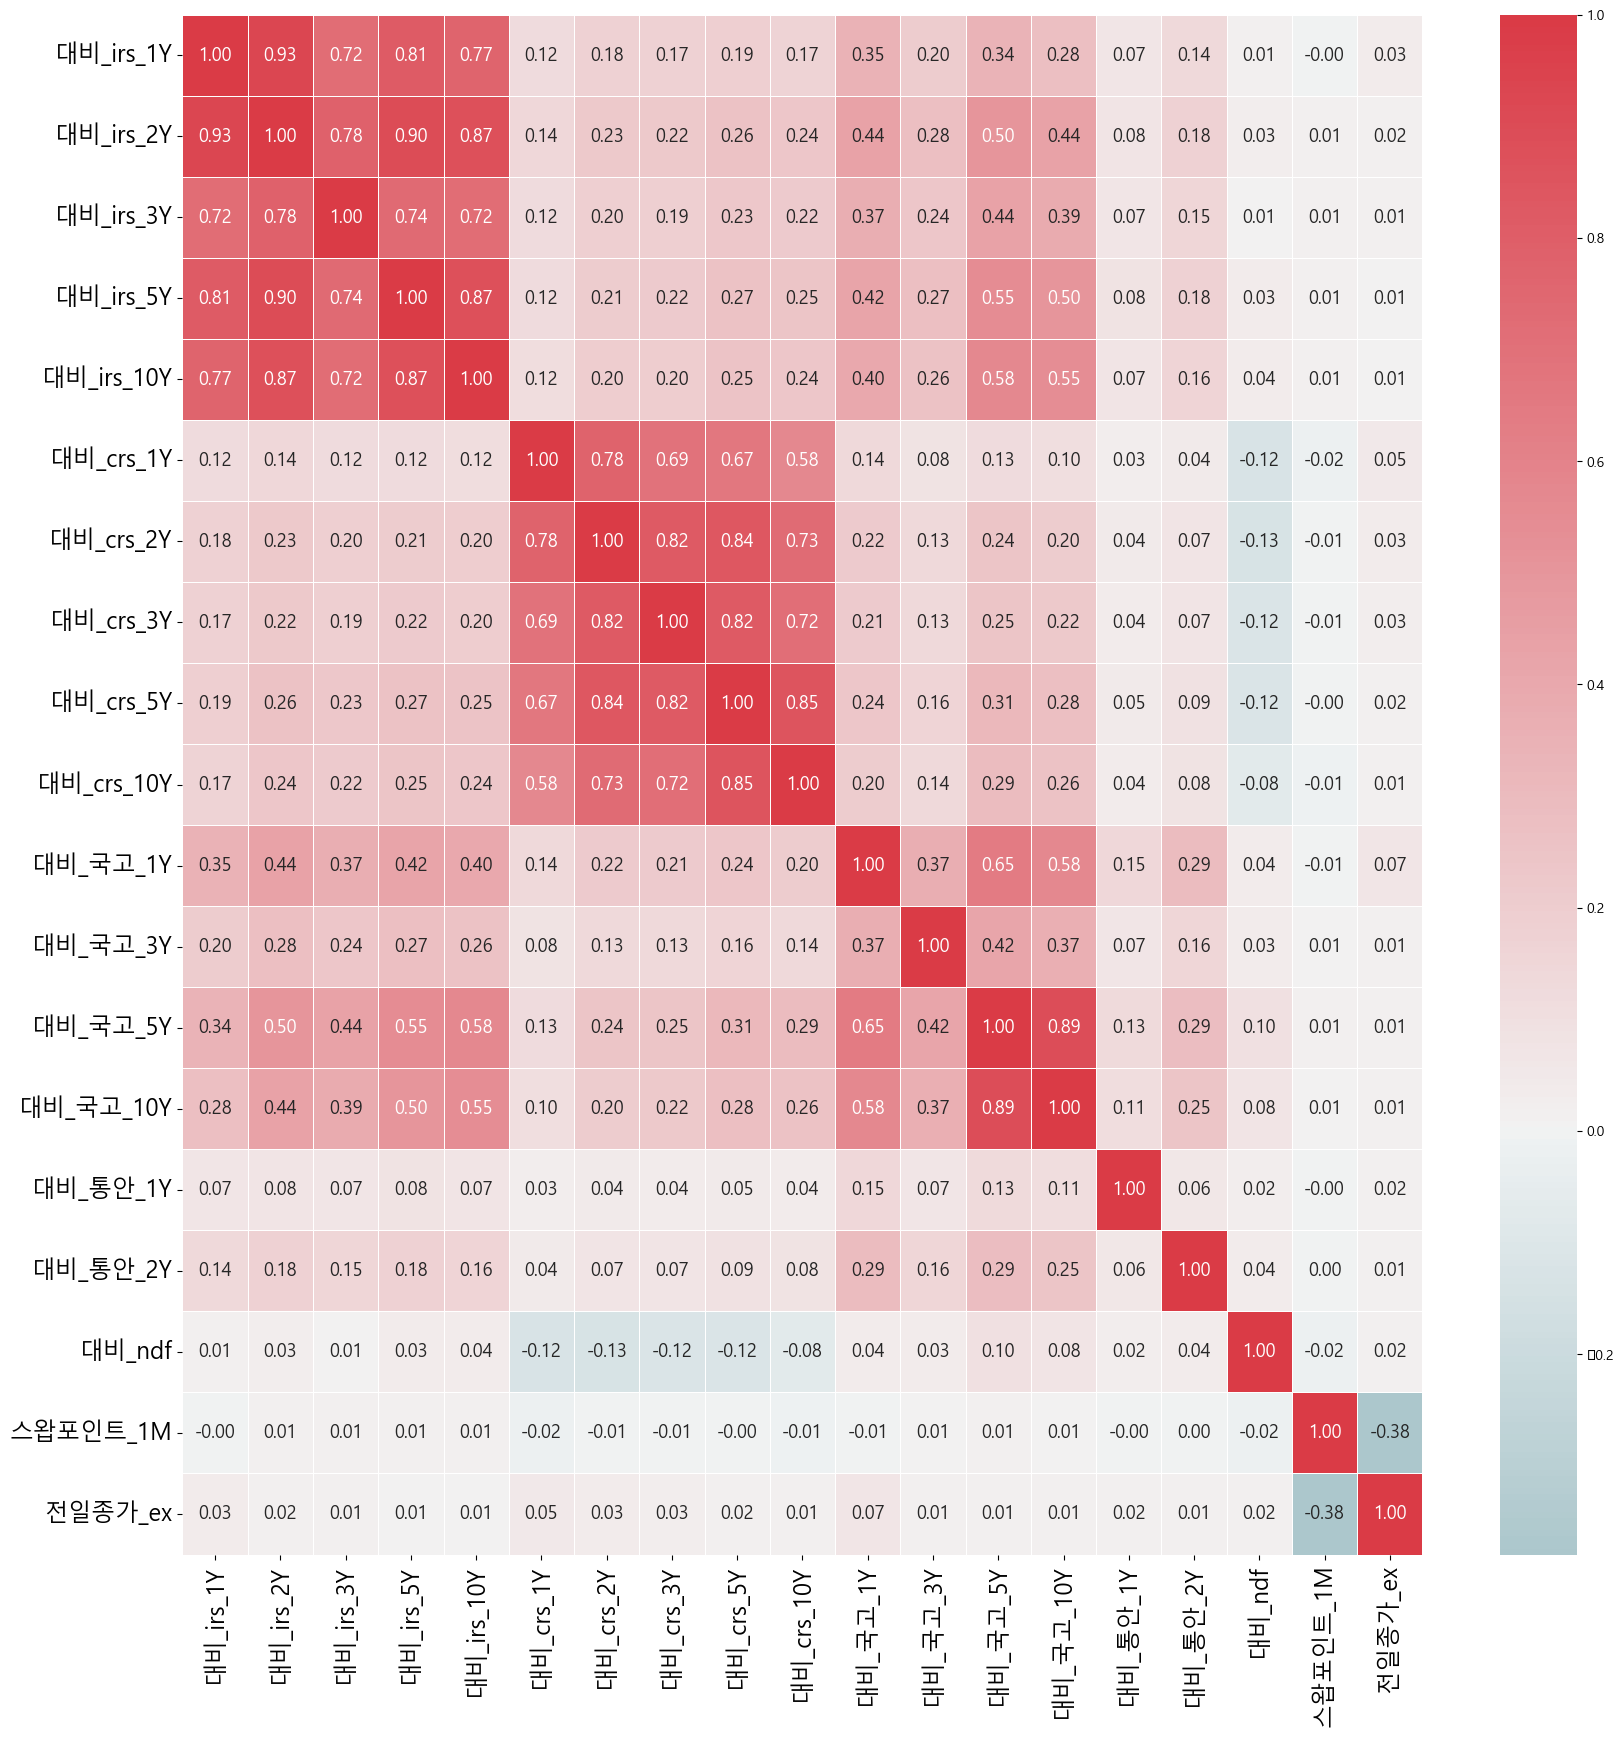

In [10]:
# 히트맵 그리기
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy as sp 
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(20,20))

cmap = sns.diverging_palette(210, 10, as_cmap=True)

res= sns.heatmap(data = x_scaled.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap=cmap, center=0, annot_kws = {'size' : 13})

res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 17)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 17)

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     9.964746   대비_irs_1Y
1    19.504498   대비_irs_2Y
2     2.663174   대비_irs_3Y
3     6.465530   대비_irs_5Y
4     5.881299  대비_irs_10Y
5     2.653893   대비_crs_1Y
6     5.271969   대비_crs_2Y
7     3.830098   대비_crs_3Y
8     6.707068   대비_crs_5Y
9     3.721094  대비_crs_10Y
10    1.925820    대비_국고_1Y
11    1.253331    대비_국고_3Y
12    6.296878    대비_국고_5Y
13    5.054795   대비_국고_10Y
14    1.025470    대비_통안_1Y
15    1.115772    대비_통안_2Y
16    1.043971      대비_ndf
17    1.169533    스왑포인트_1M
18    1.182405     전일종가_ex


In [7]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.639e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:26:26   Log-Likelihood:                -7396.7
No. Observations:                2458   AIC:                         1.483e+04
Df Residuals:                    2438   BIC:                         1.495e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.099   1.14e+04      0.000    1134.700    1135.090
대비_irs_1Y      0.1550      0.314      0.494      0.621      -0.460       0.770
대비_irs_2Y      0.4595      0.439      1.047      0.295      -0.401       1.320
대비_irs_3Y      0.0972      0.162      0.599      0.549      -0.221       0.415
대비_irs_5Y     -0.3035      0.253     -1.201      0.230      -0.799       0.192
대비_irs_10Y    -0.4536      0.241     -1.883      0.060      -0.926       0.019
대비_crs_1Y     -1.0216      0.162     -6.312      0.000      -1.339      -0.704
대비_crs_2Y     -0.0409      0.228     -0.179      0.858      -0.488       0.406
대비_crs_3Y     -0.3805      0.194     -1.957      0.050      -0.762       0.001
대비_crs_5Y      0.0679      0.257      0.264      0.792      -0.437       0.572
대비_crs_10Y     0.0124      0.192      0.065      0.948      -0.363       0.388
대비_국고_1Y       0.1715      0.138      1.244      0.214      -0.099       0.442
대비_국고_3Y      -0.2646      0.111     -2.379      0.017      -0.483      -0.047
대비_국고_5Y       0.5387      0.249      2.161      0.031       0.050       1.028
대비_국고_10Y     -0.1292      0.223     -0.579      0.563      -0.567       0.309
대비_통안_1Y      -0.0409      0.101     -0.407      0.684      -0.238       0.156
대비_통안_2Y       0.0536      0.105      0.511      0.609      -0.152       0.259
대비_ndf         2.3945      0.102     23.590      0.000       2.195       2.594
스왑포인트_1M      -0.1132      0.107     -1.054      0.292      -0.324       0.097
전일종가_ex       55.3190      0.108    512.096      0.000      55.107      55.531
==============================================================================
Omnibus:                       50.337   Durbin-Watson:                   2.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.153
Skew:                           0.046   Prob(JB):                     2.42e-23
Kurtosis:                       4.004   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
x_scaled.drop(['대비_irs_2Y'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.930317   대비_irs_1Y
1     2.552482   대비_irs_3Y
2     5.801562   대비_irs_5Y
3     5.224776  대비_irs_10Y
4     2.650955   대비_crs_1Y
5     5.260409   대비_crs_2Y
6     3.827646   대비_crs_3Y
7     6.701540   대비_crs_5Y
8     3.720950  대비_crs_10Y
9     1.914857    대비_국고_1Y
10    1.247323    대비_국고_3Y
11    6.210654    대비_국고_5Y
12    5.040965   대비_국고_10Y
13    1.025101    대비_통안_1Y
14    1.115087    대비_통안_2Y
15    1.043715      대비_ndf
16    1.169464    스왑포인트_1M
17    1.181626     전일종가_ex


In [9]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.730e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:26:33   Log-Likelihood:                -7397.2
No. Observations:                2458   AIC:                         1.483e+04
Df Residuals:                    2439   BIC:                         1.494e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.099   1.14e+04      0.000    1134.700    1135.090
대비_irs_1Y      0.4106      0.197      2.085      0.037       0.024       0.797
대비_irs_3Y      0.1318      0.159      0.830      0.406      -0.179       0.443
대비_irs_5Y     -0.2187      0.239     -0.914      0.361      -0.688       0.251
대비_irs_10Y    -0.3692      0.227     -1.626      0.104      -0.815       0.076
대비_crs_1Y     -1.0272      0.162     -6.351      0.000      -1.344      -0.710
대비_crs_2Y     -0.0297      0.228     -0.131      0.896      -0.477       0.417
대비_crs_3Y     -0.3857      0.194     -1.984      0.047      -0.767      -0.005
대비_crs_5Y      0.0756      0.257      0.294      0.769      -0.429       0.580
대비_crs_10Y     0.0137      0.192      0.071      0.943      -0.362       0.389
대비_국고_1Y       0.1824      0.137      1.327      0.185      -0.087       0.452
대비_국고_3Y      -0.2565      0.111     -2.312      0.021      -0.474      -0.039
대비_국고_5Y       0.5692      0.248      2.299      0.022       0.084       1.055
대비_국고_10Y     -0.1415      0.223     -0.634      0.526      -0.579       0.296
대비_통안_1Y      -0.0429      0.101     -0.427      0.670      -0.240       0.154
대비_통안_2Y       0.0563      0.105      0.537      0.591      -0.149       0.262
대비_ndf         2.3961      0.101     23.609      0.000       2.197       2.595
스왑포인트_1M      -0.1124      0.107     -1.046      0.296      -0.323       0.098
전일종가_ex       55.3161      0.108    512.228      0.000      55.104      55.528
==============================================================================
Omnibus:                       50.811   Durbin-Watson:                   2.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.225
Skew:                           0.051   Prob(JB):                     1.41e-23
Kurtosis:                       4.009   Cond. No.                         7.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
x_scaled.drop(['대비_irs_3Y', '대비_통안_1Y'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.618460   대비_irs_1Y
1     5.680678   대비_irs_5Y
2     5.107599  대비_irs_10Y
3     2.649304   대비_crs_1Y
4     5.259064   대비_crs_2Y
5     3.826633   대비_crs_3Y
6     6.698953   대비_crs_5Y
7     3.720141  대비_crs_10Y
8     1.899999    대비_국고_1Y
9     1.246665    대비_국고_3Y
10    6.204574    대비_국고_5Y
11    5.040883   대비_국고_10Y
12    1.114852    대비_통안_2Y
13    1.042951      대비_ndf
14    1.169446    스왑포인트_1M
15    1.181395     전일종가_ex


In [11]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.948e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:26:50   Log-Likelihood:                -7397.7
No. Observations:                2458   AIC:                         1.483e+04
Df Residuals:                    2441   BIC:                         1.493e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.099   1.14e+04      0.000    1134.700    1135.090
대비_irs_1Y      0.4555      0.189      2.411      0.016       0.085       0.826
대비_irs_5Y     -0.1900      0.237     -0.802      0.422      -0.654       0.274
대비_irs_10Y    -0.3400      0.224     -1.514      0.130      -0.780       0.100
대비_crs_1Y     -1.0308      0.162     -6.376      0.000      -1.348      -0.714
대비_crs_2Y     -0.0271      0.228     -0.119      0.905      -0.474       0.420
대비_crs_3Y     -0.3881      0.194     -1.998      0.046      -0.769      -0.007
대비_crs_5Y      0.0798      0.257      0.310      0.756      -0.424       0.584
대비_crs_10Y     0.0161      0.192      0.084      0.933      -0.360       0.392
대비_국고_1Y       0.1828      0.137      1.336      0.182      -0.086       0.451
대비_국고_3Y      -0.2548      0.111     -2.297      0.022      -0.472      -0.037
대비_국고_5Y       0.5716      0.247      2.310      0.021       0.086       1.057
대비_국고_10Y     -0.1423      0.223     -0.638      0.523      -0.580       0.295
대비_통안_2Y       0.0569      0.105      0.542      0.588      -0.149       0.263
대비_ndf         2.3936      0.101     23.598      0.000       2.195       2.593
스왑포인트_1M      -0.1124      0.107     -1.047      0.295      -0.323       0.098
전일종가_ex       55.3147      0.108    512.383      0.000      55.103      55.526
==============================================================================
Omnibus:                       50.905   Durbin-Watson:                   2.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.535
Skew:                           0.050   Prob(JB):                     1.21e-23
Kurtosis:                       4.010   Cond. No.                         7.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
x_scaled.drop(['대비_irs_5Y', '대비_crs_5Y'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     2.809930   대비_irs_1Y
1     3.638288  대비_irs_10Y
2     2.645924   대비_crs_1Y
3     4.577059   대비_crs_2Y
4     3.455012   대비_crs_3Y
5     2.425261  대비_crs_10Y
6     1.899734    대비_국고_1Y
7     1.245332    대비_국고_3Y
8     6.144310    대비_국고_5Y
9     5.039481   대비_국고_10Y
10    1.114647    대비_통안_2Y
11    1.040925      대비_ndf
12    1.169426    스왑포인트_1M
13    1.180970     전일종가_ex


In [13]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.227e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:27:06   Log-Likelihood:                -7398.1
No. Observations:                2458   AIC:                         1.483e+04
Df Residuals:                    2443   BIC:                         1.491e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.099   1.14e+04      0.000    1134.700    1135.090
대비_irs_1Y      0.3822      0.166      2.296      0.022       0.056       0.709
대비_irs_10Y    -0.4335      0.189     -2.289      0.022      -0.805      -0.062
대비_crs_1Y     -1.0269      0.162     -6.358      0.000      -1.344      -0.710
대비_crs_2Y     -0.0023      0.212     -0.011      0.991      -0.419       0.414
대비_crs_3Y     -0.3702      0.185     -2.006      0.045      -0.732      -0.008
대비_crs_10Y     0.0440      0.155      0.284      0.776      -0.259       0.347
대비_국고_1Y       0.1816      0.137      1.327      0.185      -0.087       0.450
대비_국고_3Y      -0.2567      0.111     -2.317      0.021      -0.474      -0.039
대비_국고_5Y       0.5568      0.246      2.262      0.024       0.074       1.039
대비_국고_10Y     -0.1453      0.223     -0.652      0.515      -0.582       0.292
대비_통안_2Y       0.0562      0.105      0.536      0.592      -0.149       0.262
대비_ndf         2.3918      0.101     23.609      0.000       2.193       2.590
스왑포인트_1M      -0.1127      0.107     -1.050      0.294      -0.323       0.098
전일종가_ex       55.3158      0.108    512.619      0.000      55.104      55.527
==============================================================================
Omnibus:                       50.355   Durbin-Watson:                   2.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.123
Skew:                           0.047   Prob(JB):                     2.45e-23
Kurtosis:                       4.004   Cond. No.                         6.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
x_scaled.drop(['대비_crs_2Y', '대비_crs_10Y'], axis=1, inplace=True)
feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.600e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:27:27   Log-Likelihood:                -7398.1
No. Observations:                2458   AIC:                         1.482e+04
Df Residuals:                    2445   BIC:                         1.490e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.099   1.14e+04      0.000    1134.701    1135.090
대비_irs_1Y      0.3802      0.166      2.288      0.022       0.054       0.706
대비_irs_10Y    -0.4298      0.189     -2.275      0.023      -0.800      -0.059
대비_crs_1Y     -1.0203      0.138     -7.373      0.000      -1.292      -0.749
대비_crs_3Y     -0.3465      0.142     -2.442      0.015      -0.625      -0.068
대비_국고_1Y       0.1800      0.137      1.317      0.188      -0.088       0.448
대비_국고_3Y      -0.2565      0.111     -2.316      0.021      -0.474      -0.039
대비_국고_5Y       0.5614      0.245      2.288      0.022       0.080       1.043
대비_국고_10Y     -0.1448      0.223     -0.650      0.516      -0.582       0.292
대비_통안_2Y       0.0562      0.105      0.537      0.592      -0.149       0.262
대비_ndf         2.3919      0.101     23.663      0.000       2.194       2.590
스왑포인트_1M      -0.1132      0.107     -1.055      0.292      -0.324       0.097
전일종가_ex       55.3151      0.108    512.930      0.000      55.104      55.527
==============================================================================
Omnibus:                       50.203   Durbin-Watson:                   2.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.638
Skew:                           0.048   Prob(JB):                     3.13e-23
Kurtosis:                       4.001   Cond. No.                         6.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
x_scaled.drop(['대비_국고_10Y', '대비_통안_2Y'], axis=1, inplace=True)
feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.122e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:27:46   Log-Likelihood:                -7398.5
No. Observations:                2458   AIC:                         1.482e+04
Df Residuals:                    2447   BIC:                         1.488e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.099   1.14e+04      0.000    1134.701    1135.090
대비_irs_1Y      0.4020      0.164      2.457      0.014       0.081       0.723
대비_irs_10Y    -0.4561      0.185     -2.459      0.014      -0.820      -0.092
대비_crs_1Y     -1.0181      0.138     -7.361      0.000      -1.289      -0.747
대비_crs_3Y     -0.3478      0.142     -2.452      0.014      -0.626      -0.070
대비_국고_1Y       0.1866      0.135      1.378      0.168      -0.079       0.452
대비_국고_3Y      -0.2543      0.111     -2.298      0.022      -0.471      -0.037
대비_국고_5Y       0.4509      0.159      2.839      0.005       0.139       0.762
대비_ndf         2.3944      0.101     23.703      0.000       2.196       2.592
스왑포인트_1M      -0.1126      0.107     -1.050      0.294      -0.323       0.098
전일종가_ex       55.3143      0.108    513.078      0.000      55.103      55.526
==============================================================================
Omnibus:                       50.239   Durbin-Watson:                   2.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.141
Skew:                           0.042   Prob(JB):                     2.43e-23
Kurtosis:                       4.005   Cond. No.                         4.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
x_scaled.drop(['스왑포인트_1M'], axis=1, inplace=True)
feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.468e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:28:18   Log-Likelihood:                -7399.0
No. Observations:                2458   AIC:                         1.482e+04
Df Residuals:                    2448   BIC:                         1.488e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.099   1.14e+04      0.000    1134.701    1135.090
대비_irs_1Y      0.4016      0.164      2.455      0.014       0.081       0.722
대비_irs_10Y    -0.4565      0.185     -2.461      0.014      -0.820      -0.093
대비_crs_1Y     -1.0183      0.138     -7.362      0.000      -1.290      -0.747
대비_crs_3Y     -0.3472      0.142     -2.447      0.014      -0.625      -0.069
대비_국고_1Y       0.1847      0.135      1.364      0.173      -0.081       0.450
대비_국고_3Y      -0.2545      0.111     -2.299      0.022      -0.472      -0.037
대비_국고_5Y       0.4506      0.159      2.837      0.005       0.139       0.762
대비_ndf         2.3958      0.101     23.719      0.000       2.198       2.594
전일종가_ex       55.3572      0.100    554.793      0.000      55.161      55.553
==============================================================================
Omnibus:                       49.933   Durbin-Watson:                   2.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.299
Skew:                           0.041   Prob(JB):                     3.71e-23
Kurtosis:                       4.001   Cond. No.                         4.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
x_scaled.drop(['대비_국고_1Y'], axis=1, inplace=True)
feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.901e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:28:32   Log-Likelihood:                -7399.9
No. Observations:                2458   AIC:                         1.482e+04
Df Residuals:                    2449   BIC:                         1.487e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.099   1.14e+04      0.000    1134.701    1135.090
대비_irs_1Y      0.4458      0.160      2.779      0.005       0.131       0.760
대비_irs_10Y    -0.4877      0.184     -2.649      0.008      -0.849      -0.127
대비_crs_1Y     -1.0136      0.138     -7.330      0.000      -1.285      -0.742
대비_crs_3Y     -0.3440      0.142     -2.424      0.015      -0.622      -0.066
대비_국고_3Y      -0.2348      0.110     -2.139      0.033      -0.450      -0.020
대비_국고_5Y       0.5640      0.135      4.166      0.000       0.299       0.829
대비_ndf         2.3927      0.101     23.691      0.000       2.195       2.591
전일종가_ex       55.3675      0.100    556.412      0.000      55.172      55.563
==============================================================================
Omnibus:                       47.718   Durbin-Watson:                   2.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.363
Skew:                           0.030   Prob(JB):                     7.21e-22
Kurtosis:                       3.973   Cond. No.                         3.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
x_scaled.columns

Index(['대비_irs_1Y', '대비_irs_10Y', '대비_crs_1Y', '대비_crs_3Y', '대비_국고_3Y',
       '대비_국고_5Y', '대비_ndf', '전일종가_ex'],
      dtype='object')

In [19]:
import numpy as np 
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=40)
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

y_pred = mlr.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)

print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test, y_pred)))

MSE : 26.38109161383469, RMSE :  5.136, MAE: 5.136
Variance score :  0.991


In [20]:
from sklearn.model_selection import cross_val_score
neg_mse_scores = cross_val_score(mlr, x_scaled, y,scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 *neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_rmse,rmse_scores, neg_mse_scores

(5.022481791706374,
 array([3.94370631, 6.25020477, 5.17463097, 5.17045906, 4.57340784]),
 array([-15.55281947, -39.06505971, -26.77680564, -26.73364693,
        -20.9160593 ]))

In [27]:
import pandas as pd
import numpy as np

df_ex = pd.read_excel('./xlsx/df_ex.xlsx')
df_ex= df_ex.set_index("DateTime")


df_ex_data=df_ex[['대비_irs_1Y', '대비_irs_10Y', '대비_crs_1Y', '대비_crs_3Y', '대비_국고_3Y',
       '대비_국고_5Y', '대비_ndf', '전일종가_ex']]
df_ex_target = df_ex["종가"]

In [28]:
df_ex_data.feature = df_ex_data.columns 

from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()

# MinMadf_ex_dataScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(df_ex_data)
data_scaled = scaler.transform(df_ex_data)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
df_ex_data_scaled = pd.DataFrame(data = data_scaled, columns=df_ex_data.feature)

df_ex_data_scaled.index = df_ex_data.index # 인덱스가 달라서 똑같이 설정

# df_ex_data_scaled = df_ex_data_scaled.dropna()
df_ex_data_scaled

C:\Users\hyeok\AppData\Local\Temp\ipykernel_2236\3553863857.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_ex_data.feature = df_ex_data.columns


,대비_irs_1Y,대비_irs_10Y,대비_crs_1Y,대비_crs_3Y,대비_국고_3Y,대비_국고_5Y,대비_ndf,전일종가_ex
DateTime,,,,,,,,
2012-08-03,-0.848634,-0.405433,-0.207333,-0.464219,-0.326540,-1.874896,0.184855,-0.076063
2012-08-06,0.553950,0.197660,-0.004827,-0.691462,0.156825,-0.004534,-0.451826,-0.021997
2012-08-07,0.273433,0.398691,0.400185,-0.009732,-0.004297,-0.004534,0.019790,-0.123154
2012-08-08,0.273433,0.599722,0.197679,-0.009732,-0.326540,-0.538923,0.055161,-0.126642
2012-08-09,1.395500,0.800753,1.817726,0.899240,0.962434,1.331439,0.102323,-0.135362
...,...,...,...,...,...,...,...,...
2022-08-19,0.553950,2.006938,0.197679,0.671997,1.123555,2.400217,0.564506,3.220249
2022-08-22,0.834467,0.599722,-0.409839,0.671997,0.801312,1.064244,0.404157,3.310941
2022-08-23,1.395500,0.398691,-0.207333,0.671997,0.156825,-0.806118,0.366427,3.553368


In [29]:
X_train = df_ex_data_scaled[['대비_irs_1Y', '대비_irs_10Y', '대비_crs_1Y', '대비_crs_3Y', '대비_국고_3Y',
       '대비_국고_5Y', '대비_ndf', '전일종가_ex']][:2457]
X_test = df_ex_data_scaled[['대비_irs_1Y', '대비_irs_10Y', '대비_crs_1Y', '대비_crs_3Y', '대비_국고_3Y',
       '대비_국고_5Y', '대비_ndf', '전일종가_ex']][2457:]
y_train =  df_ex_target[:2457]
y_test =  df_ex_target[2457:]

In [30]:
import numpy as np 
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_pred = mlr.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)

print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test, y_pred)))

MSE : 46.8894393931916, RMSE :  6.848, MAE: 6.848
Variance score :  0.794


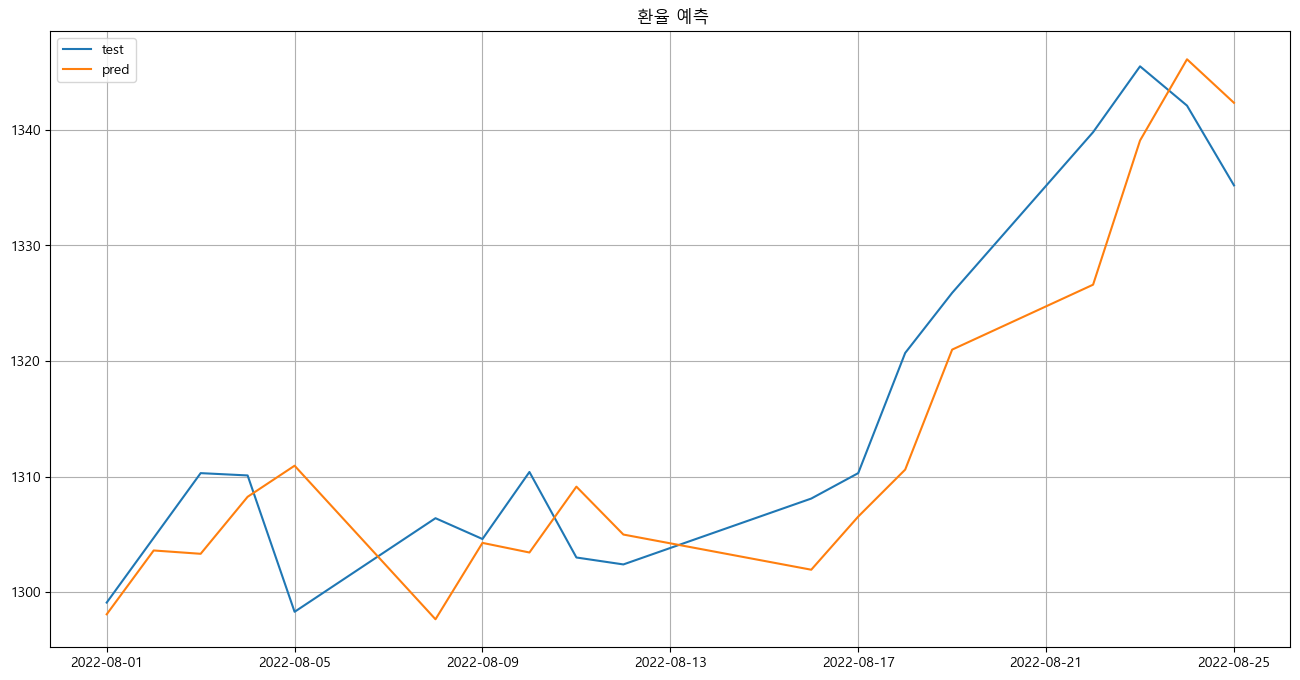

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.title(' 환율 예측')
plt.plot(y_test.index, y_test.values, label="test")
plt.plot(y_test.index, y_pred, label="pred")
plt.legend(loc='best')
plt.grid()
plt.show()